Make sure that libraries are already installed.

In [1]:
import platform
import os, sys
import numpy as np
from osgeo import gdal, ogr
gdal.UseExceptions()     

print("Python Version",platform.python_version())
print("GDAL Version", gdal.__version__)

Python Version 3.7.3
GDAL Version 2.4.1


As long as Sentinel-2 data is stored in [JPEG2000 format](https://github.com/uclouvain/openjpeg), we need the "driver" that understands this image compression format which is known as a .jp2 file. So, we have to check it's installation as well.

In [5]:
!gdalinfo --formats | grep JPEG2000

Get testing data

Download from copernicus the following files:

T18NZN_20181217T151659_TCI_10m.jp2

T18NZN_20181222T151701_TCI_10m.jp2

T18NZN_20190106T151659_TCI_10m.jp2

T18NZN_20190111T151701_TCI_10m.jp2

T18NZN_20190126T151709_TCI_10m.jp2

In order to get data we use the sentinel hub API

In [61]:
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date
from collections import OrderedDict
import kml2geojson
import re
#import wget, urllib
#from urllib.request import urlopen

Create an instance from sentinelhub by using credentials from your account

In [7]:
api = SentinelAPI('dacostaortiz', 'pokemonuis', 'https://scihub.copernicus.eu/dhus')

Data retrived can be referenced from a previous created shapefile.

In [12]:
kml2geojson.main.convert('santander.kml', './') #this will converte the kml to a geojson file

footprint = geojson_to_wkt(read_geojson('santander.geojson'))

By using the created file, data can be query from copernicus servers by the Sentinel Hub API.

In [16]:
products = api.query(footprint,
                   date = ('20181201', date(2019, 1, 31)),
                   platformname = 'Sentinel-2',
                   cloudcoverpercentage = (0, 100))

Querying products: 100%|██████████| 271/271 [00:03<00:00, 43.69 products/s]


In [17]:
products

OrderedDict([('d0961668-17c0-4290-9f33-becf5d3f7887',
              {'title': 'S2B_MSIL2A_20190129T152639_N0211_R025_T18NYP_20190129T211119',
               'link': "https://scihub.copernicus.eu/dhus/odata/v1/Products('d0961668-17c0-4290-9f33-becf5d3f7887')/$value",
               'link_alternative': "https://scihub.copernicus.eu/dhus/odata/v1/Products('d0961668-17c0-4290-9f33-becf5d3f7887')/",
               'link_icon': "https://scihub.copernicus.eu/dhus/odata/v1/Products('d0961668-17c0-4290-9f33-becf5d3f7887')/Products('Quicklook')/$value",
               'summary': 'Date: 2019-01-29T15:26:39.024Z, Instrument: MSI, Mode: , Satellite: Sentinel-2, Size: 589.83 MB',
               'ingestiondate': datetime.datetime(2019, 1, 30, 4, 44, 35, 438000),
               'beginposition': datetime.datetime(2019, 1, 29, 15, 26, 39, 24000),
               'endposition': datetime.datetime(2019, 1, 29, 15, 26, 39, 24000),
               'orbitnumber': 9918,
               'relativeorbitnumber': 25,


In [20]:
products_df = api.to_geodataframe(products)
products_df

,title,link,link_alternative,link_icon,summary,ingestiondate,beginposition,endposition,orbitnumber,relativeorbitnumber,...,processinglevel,producttype,platformname,size,uuid,datatakesensingstart,sensoroperationalmode,tileid,hv_order_tileid,geometry
00723880-6f14-4b98-9232-bf0aa68e4cb7,S2B_MSIL2A_20190116T151709_N0211_R125_T18PZQ_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-01-16T15:17:09.024Z, Instrument: MS...",2019-01-17 04:39:58.712,2019-01-16 15:17:09.024,2019-01-16 15:17:09.024,9732,125,...,Level-2A,S2MSI2A,Sentinel-2,1.11 GB,00723880-6f14-4b98-9232-bf0aa68e4cb7,NaT,NaN,NaN,NaN,POLYGON ((-71.57989499999999 9.030504166854142...
013b614a-f8b8-4974-9343-3b3f657b81c2,S2B_MSIL2A_20190116T151709_N0211_R125_T18NYN_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-01-16T15:17:09.024Z, Instrument: MS...",2019-01-17 04:48:33.229,2019-01-16 15:17:09.024,2019-01-16 15:17:09.024,9732,125,...,Level-2A,S2MSI2A,Sentinel-2,940.66 MB,013b614a-f8b8-4974-9343-3b3f657b81c2,NaT,NaN,NaN,NaN,"POLYGON ((-73.19208 6.395960868853862, -73.161..."
025b115a-645f-43b1-b50b-191d795e925f,S2A_MSIL2A_20190114T152641_N0211_R025_T18PXR_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-01-14T15:26:41.024Z, Instrument: MS...",2019-01-14 22:46:15.495,2019-01-14 15:26:41.024,2019-01-14 15:26:41.024,18612,25,...,Level-2A,S2MSI2A,Sentinel-2,1.10 GB,025b115a-645f-43b1-b50b-191d795e925f,NaT,NaN,NaN,NaN,"POLYGON ((-74.08774 9.950163774144059, -73.086..."
02a57ae7-a504-4b97-a63b-f2f6098d33db,S2A_MSIL1C_20190101T151701_N0207_R125_T18NYN_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-01-01T15:17:01.024Z, Instrument: MS...",2019-01-01 18:16:29.436,2019-01-01 15:17:01.024,2019-01-01 15:17:01.024,18426,125,...,Level-1C,S2MSI1C,Sentinel-2,771.88 MB,02a57ae7-a504-4b97-a63b-f2f6098d33db,2019-01-01 15:17:01.024,INS-NOBS,18NYN,NN18Y,(POLYGON ((-73.19213999999999 6.37884189619031...
02ac22aa-f915-4cd5-b662-0d9c2f939a40,S2B_MSIL2A_20190106T151659_N0211_R125_T18NZN_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-01-06T15:16:59.024Z, Instrument: MS...",2019-01-07 04:23:33.740,2019-01-06 15:16:59.024,2019-01-06 15:16:59.024,9589,125,...,Level-2A,S2MSI2A,Sentinel-2,979.78 MB,02ac22aa-f915-4cd5-b662-0d9c2f939a40,NaT,NaN,NaN,NaN,POLYGON ((-72.28369000000001 7.229727890841263...
02c2e846-e5af-4aa8-b2a1-a5dc47ac2e6a,S2B_MSIL1C_20181210T152629_N0207_R025_T18NYP_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2018-12-10T15:26:29.024Z, Instrument: MS...",2018-12-10 19:16:08.439,2018-12-10 15:26:29.024,2018-12-10 15:26:29.024,9203,25,...,Level-1C,S2MSI1C,Sentinel-2,392.76 MB,02c2e846-e5af-4aa8-b2a1-a5dc47ac2e6a,2018-12-10 15:26:29.024,INS-NOBS,18NYP,NP18Y,"(POLYGON ((-72.603424 8.134664981934236, -73.1..."
0379f310-b9bf-4743-988d-a3e9d7cbd38d,S2B_MSIL2A_20190119T152639_N0211_R025_T18PXR_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-01-19T15:26:39.024Z, Instrument: MS...",2019-01-20 00:12:56.628,2019-01-19 15:26:39.024,2019-01-19 15:26:39.024,9775,25,...,Level-2A,S2MSI2A,Sentinel-2,474.01 MB,0379f310-b9bf-4743-988d-a3e9d7cbd38d,NaT,NaN,NaN,NaN,"POLYGON ((-74.08905 9.453226137724503, -73.910..."
0392ea21-83ca-4630-9d49-d15a038f121c,S2A_MSIL2A_20190121T151701_N0211_R125_T18NZN_2..

I've defined two functions over the generated metadata dataframe in order to get some insigths from data that we could potentially download.

In [21]:
def query_size(df):
    c = 0
    for f in df['size']:
        d = f.split(' ')
        if d[1] == 'MB':
            c+=float(d[0])/1000
        else:
            c+=float(d[0])
    print("size in GB: "+str(c))
def query_clouds(df):
    print("media: ",df['cloudcoverpercentage'].mean())
    print("mediana",df['cloudcoverpercentage'].median())
    print("max",df['cloudcoverpercentage'].max())
    print("min",df['cloudcoverpercentage'].min())

In [28]:
query_size(products_df)

size in GB: 191.01443000000003


media:  31.268805774907747
mediana 22.3315
max 99.88149700000001
min 0.0404


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d9bcebb00>]],
      dtype=object)

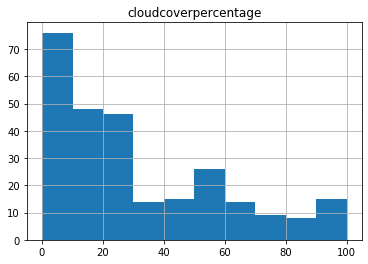

In [29]:
query_clouds(products_df)
products_df.hist(column='cloudcoverpercentage',bins=10)

From previous histofram we can notice that most of images were taken with low cloud coverage.

Now let's choose a single tile.

In [95]:
tile = 'T18NZN'

In [97]:
fk = [] #filtered keys
for k, v in products.items(): 
    if all(e in v['title'].split('_') for e in ['MSIL2A',tile]): # MSIL2A it's product type
        #print(k, v['title']) 
        fk.append(k)
filtered = { k: products[k] for k in fk }
api.to_geodataframe(filtered)

,title,link,link_alternative,link_icon,summary,ingestiondate,beginposition,endposition,orbitnumber,relativeorbitnumber,...,platformidentifier,orbitdirection,platformserialidentifier,processingbaseline,processinglevel,producttype,platformname,size,uuid,geometry
02ac22aa-f915-4cd5-b662-0d9c2f939a40,S2B_MSIL2A_20190106T151659_N0211_R125_T18NZN_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-01-06T15:16:59.024Z, Instrument: MS...",2019-01-07 04:23:33.740,2019-01-06 15:16:59.024,2019-01-06 15:16:59.024,9589,125,...,2017-013A,DESCENDING,Sentinel-2B,02.11,Level-2A,S2MSI2A,Sentinel-2,979.78 MB,02ac22aa-f915-4cd5-b662-0d9c2f939a40,POLYGON ((-72.28369000000001 7.229727890841263...
0392ea21-83ca-4630-9d49-d15a038f121c,S2A_MSIL2A_20190121T151701_N0211_R125_T18NZN_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-01-21T15:17:01.024Z, Instrument: MS...",2019-01-21 21:44:49.803,2019-01-21 15:17:01.024,2019-01-21 15:17:01.024,18712,125,...,2015-028A,DESCENDING,Sentinel-2A,02.11,Level-2A,S2MSI2A,Sentinel-2,1.01 GB,0392ea21-83ca-4630-9d49-d15a038f121c,POLYGON ((-72.28369000000001 7.229727890841263...
0ac0603d-e102-46eb-b7e9-5a10776de7cc,S2A_MSIL2A_20181222T151701_N0211_R125_T18NZN_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2018-12-22T15:17:01.024Z, Instrument: MS...",2018-12-22 22:08:18.779,2018-12-22 15:17:01.024,2018-12-22 15:17:01.024,18283,125,...,2015-028A,DESCENDING,Sentinel-2A,02.11,Level-2A,S2MSI2A,Sentinel-2,1.05 GB,0ac0603d-e102-46eb-b7e9-5a10776de7cc,POLYGON ((-72.28369000000001 7.229727890841263...
257b29b0-5c13-475b-b7b6-8b486abfecc8,S2B_MSIL2A_20181227T151659_N0211_R125_T18NZN_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2018-12-27T15:16:59.024Z, Instrument: MS...",2018-12-27 23:59:44.906,2018-12-27 15:16:59.024,2018-12-27 15:16:59.024,9446,125,...,2017-013A,DESCENDING,Sentinel-2B,02.11,Level-2A,S2MSI2A,Sentinel-2,1.08 GB,257b29b0-5c13-475b-b7b6-8b486abfecc8,POLYGON ((-72.28369000000001 7.229727890841263...
30138845-dbb4-420a-bc7d-3e91d08a0083,S2B_MSIL2A_20190126T151709_N0211_R125_T18NZN_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-01-26T15:17:09.024Z, Instrument: MS...",2019-01-26 23:16:10.047,2019-01-26 15:17:09.024,2019-01-26 15:17:09.024,9875,125,...,2017-013A,DESCENDING,Sentinel-2B,02.11,Level-2A,S2MSI2A,Sentinel-2,946.70 MB,30138845-dbb4-420a-bc7d-3e91d08a0083,POLYGON ((-72.28369000000001 7.229727890841263...
6a5b4db6-08e3-4a92-b789-e4dd3d786965,S2A_MSIL2A_20190111T151701_N0211_R125_T18NZN_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-01-11T15:17:01.024Z, Instrument: MS...",2019-01-11 23:07:49.021,2019-01-11 15:17:01.024,2019-01-11 15:17:01.024,18569,125,...,2015-028A,DESCENDING,Sentinel-2A,02.11,Level-2A,S2MSI2A,Sentinel-2,953.43 MB,6a5b4db6-08e3-4a92-b789-e4dd3d786965,POLYGON ((-72.28369000000001 7.229727890841263...
9787b2ba-4052-442d-bff9-dfe510d02b5c,S2A_MSIL2A_20190101T151701_N0211_R125_T18NZN_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-01-01T15:17:01.024Z, Instrument: MS...",2019-01-01 22:08:37.169,2019-01-01 15:17:01.024,2019-01-01 15:17:01.024,18426,125,...,2015-028A,DESCENDING,Sentinel-2A,02.11,Level-2A,S2MSI2A,Sentinel-2,1.01 GB,9787b2ba-4052-442d-bff9-dfe510d02b5c,POLYGON ((-72.2836900000000

Then, let's use the filtered dataframe to download the files.

In [98]:
api.download_all(filtered)

Downloading:   5%|▌         | 53.5M/993M [01:21<1:10:37, 222kB/s] 


KeyboardInterrupt: 

In [3]:
#!gdalinfo ../tiler/T18NZN_20181217T151659_TCI_10m.jp2

ERROR 4: ../tiler/T18NZN_20181217T151659_TCI_10m.jp2: No such file or directory
gdalinfo failed - unable to open '../tiler/T18NZN_20181217T151659_TCI_10m.jp2'.


In [2]:
dset = gdal.Open('../tiler/T18NZN_20181217T151659_TCI_10m.jp2')
##print(dset)
width = dset.RasterXSize
height = dset.RasterYSize

print(width, 'x', height)

10980 x 10980


<bound method MajorObject.GetMetadata of <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f7f9d340f00> >>

In order to visualize on the notebook the images, I've built a function to load pixels.

In [27]:
import cv2
import glob
#import rasterio
#from rasterio import plot
import matplotlib.pyplot as plt
%matplotlib inline
#imagePath = '../data/2019-01/S2B_MSIL1C_20190129T152639_N0207_R025_T18PYQ_20190129T201832.SAFE/GRANULE/L1C_T18PYQ_A009918_20190129T152639/IMG_DATA/'

In [15]:
def load_data_bands(path,bands='bgrn'):
    bmd = {'bgrn':['02','03','04','08'],
           'rgb':['04','03','02'],
           'all':['01','02','03','04','05','06','07','08','09','10','11','12']} #dictionary bands map
    arrs = []
    meta = None
    try:
        jp2s=bmd[bands]
        for jp2 in jp2s:
            with rasterio.open(glob.glob(path+'*B'+jp2+'.jp2')[0]) as f:
                print(f)
                arrs.append(f.read(1))
            if jp2 == '02':
                meta = f.meta
        if bands in {'bgrn','rgb'}: 
            data = np.array(arrs,dtype=arrs[0].dtype)
        else: 
            data = arrs
        return data, meta
    except:
        print('bands map not defined')
        return None, None